In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#from scipy import signal
import pandas as pd
import pywt
import matplotlib.dates as mdates

### functions

In [2]:
def create_white_noise(n: int, period:float, amp: float, phase=None):
    from numpy import cos, pi
    """
    n: vecor length
    period: time
    amp: signal amplitude
    phase(optional): displacement of the wave with respect to the origin 
    """
    if phase:
        wave =[amp * cos((i*pi)/period + phase) for i in range(n)]
        wave = np.array(wave)
        return wave
    else:
        wave =[amp * cos((i*pi)/period) for i in range(n)]
        wave = np.array(wave)
        return wave

In [ ]:
def add_noise(x:pd.Series, noise:np.asarray)->np.asarray:
    x_no_nan = x.copy()
    nan_idx = x_no_nan.isna()
    x_no_nan.loc[nan_idx] = 0
    
    r = x_no_nan + noise
    r = np.array(x_no_nan)
    return r

In [23]:
# Ruidos
noise1 = create_white_noise(n=3500, period=1_000, amp=0.01, phase=0.25*np.pi)
#noise2 = create_white_noise(n=10000, period=1_000, amp=0.01, phase=0)

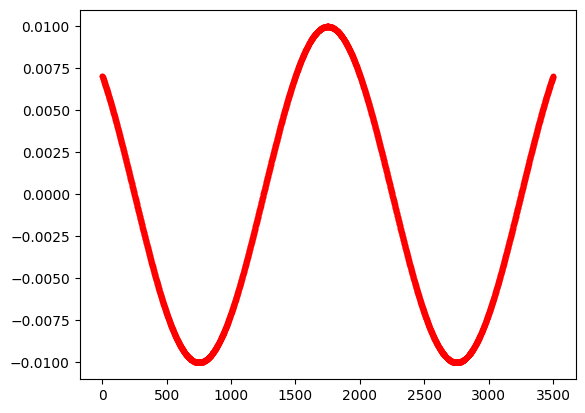

In [24]:
plt.plot(noise1,'.r')

### reading data

In [25]:
data = pd.read_csv('../data/boia/ul-boia-completo.csv', delimiter=';')

In [26]:
who

add_noise	 coeffs	 create_white_noise	 data	 freqs	 mdates	 noise1	 np	 pd	 
plt	 pywt	 r	 wavelet	 


In [27]:
data.shape

(7016, 21)

## wavelets analysis



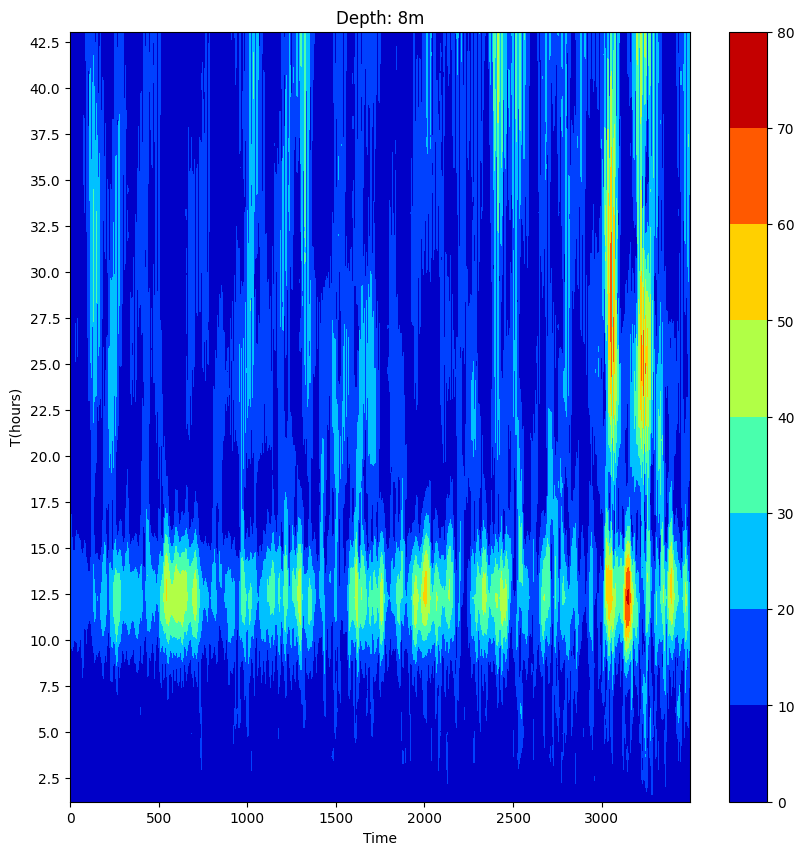

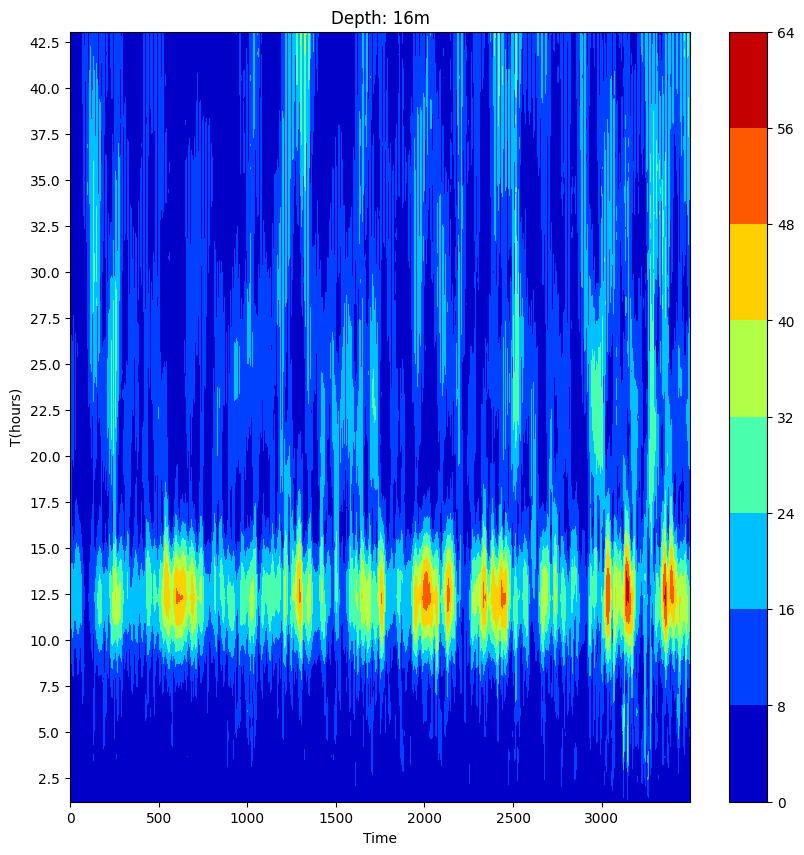

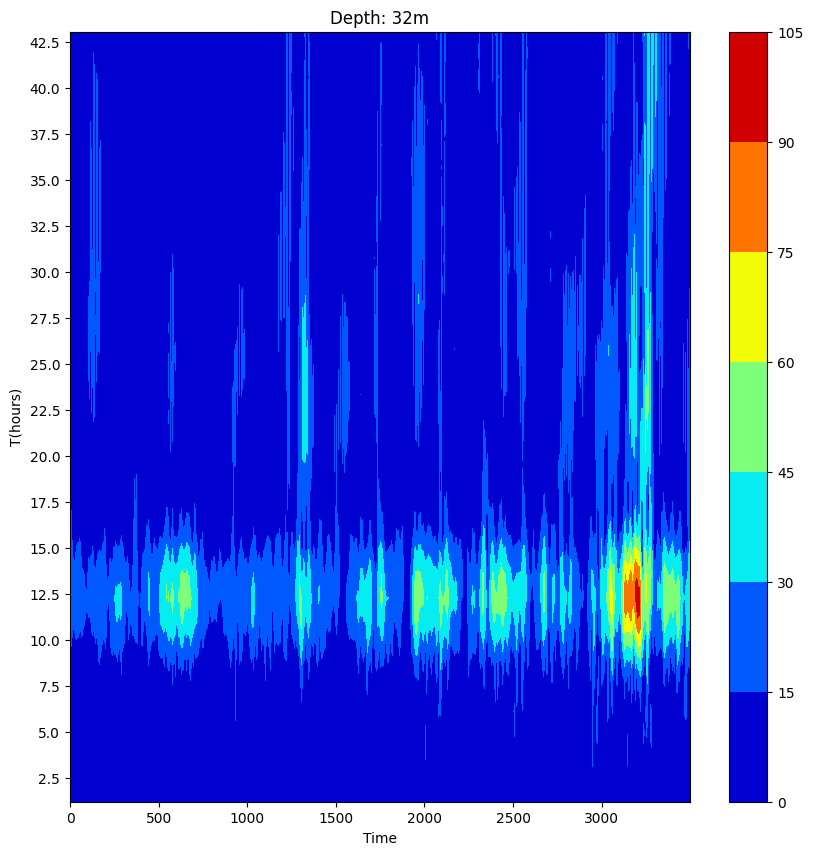

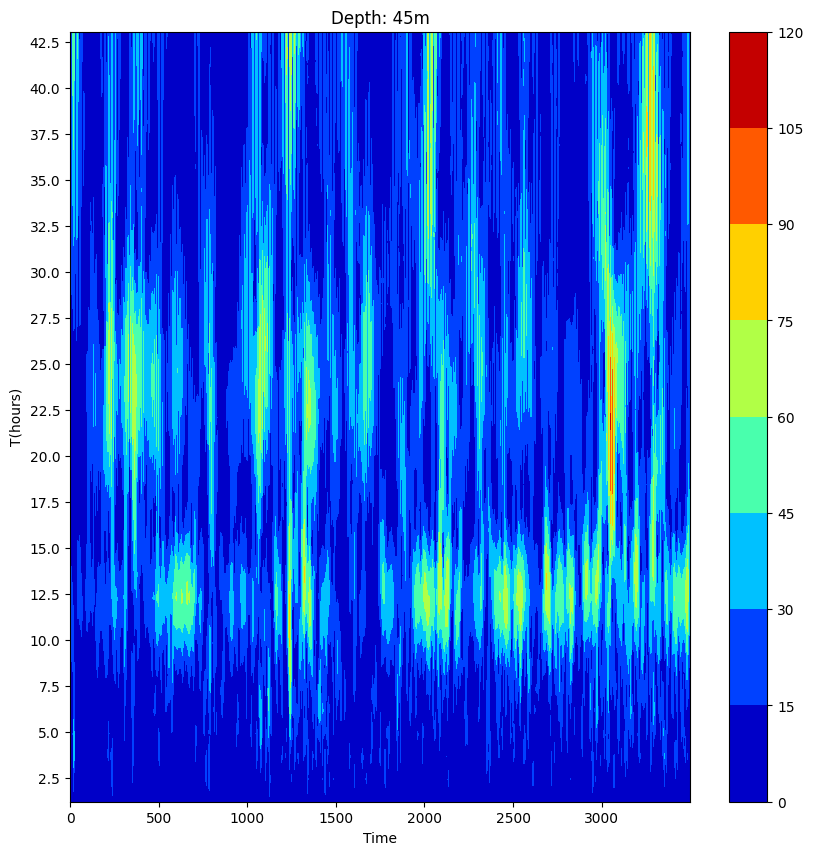

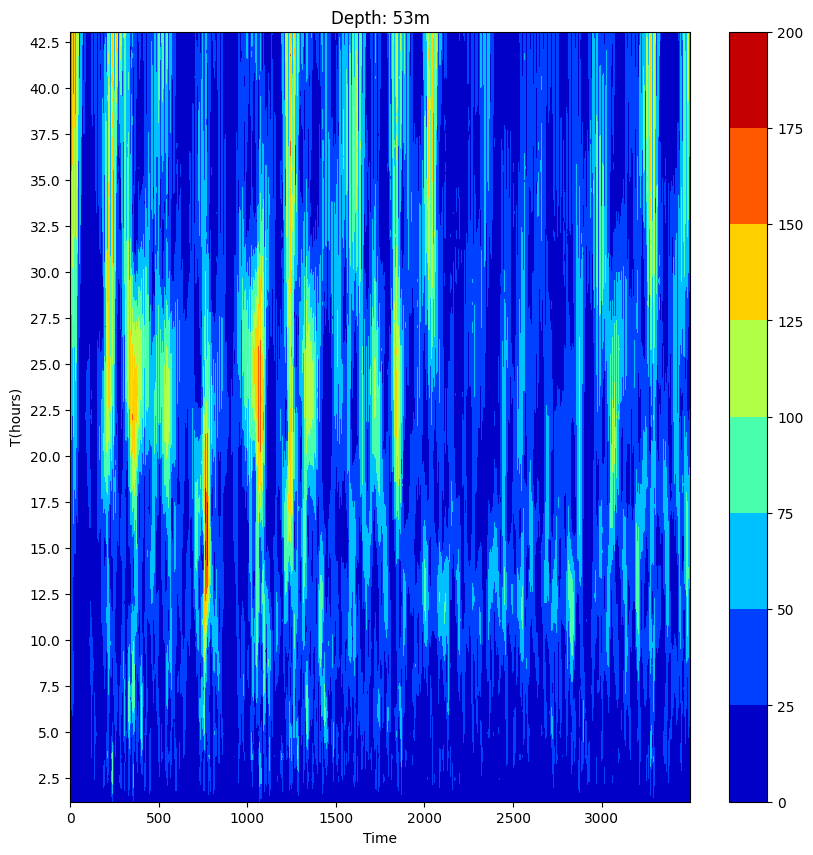

In [82]:
for col, depth in zip([1, 4, 10, 16, 19],['8','16','32','45','53']):
    r = add_noise(data.iloc[0:3500, col], noise1)# white noise
    # Define the wavelet function
    wavelet = 'morl'
    # Compute the wavelet transform
    wavelet = 'morl'  # Mother wavelet to use
    scales = np.arange(1, 36)  # Scales to use
    coefficients, frequencies = pywt.cwt(r, scales, wavelet, sampling_period=1)
    T_wave = 1/frequencies
    # Plot the wavelet spectrum
    fig, ax = plt.subplots(figsize=(10, 10))

    #ax.set_yscale('log')
    ax.set_ylabel('T(hours)')
    ax.set_xlabel('Time')
    ax.set_yticks(np.arange(0, T_wave.max(), 2.5))
    plt.title(f'Depth: {depth}m')
    im = ax.contourf(np.arange(len(r)), T_wave, np.abs(coefficients), cmap='jet')
    fig.colorbar(im, ax=ax)
    plt.show()